In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing pada dataset Emas

In [4]:
df_gold = pd.read_csv("../dataset/gold_data_cleaned.csv")

# Cek ringkasan dataset
print(df_gold.info())
print(df_gold.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6066 entries, 0 to 6065
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   6066 non-null   object 
 1   Open    6065 non-null   object 
 2   High    6065 non-null   object 
 3   Low     6065 non-null   object 
 4   Close   6065 non-null   object 
 5   Volume  6065 non-null   object 
 6   Return  6064 non-null   float64
 7   Ticker  6064 non-null   object 
dtypes: float64(1), object(7)
memory usage: 379.3+ KB
None
            Return
count  6064.000000
mean      0.000433
std       0.010900
min      -0.093538
25%      -0.004791
50%       0.000473
75%       0.006237
max       0.090277


In [5]:
print(df_gold.head(5))

        Price                Open                High                 Low  \
0      Ticker                GC=F                GC=F                GC=F   
1        Date                 NaN                 NaN                 NaN   
2  2000-08-31  274.79998779296875  278.29998779296875  274.79998779296875   
3  2000-09-01               277.0               277.0               277.0   
4  2000-09-05  275.79998779296875  275.79998779296875  275.79998779296875   

                Close Volume    Return Ticker  
0                GC=F   GC=F       NaN    NaN  
1                 NaN    NaN       NaN    NaN  
2  278.29998779296875      0  0.016064   GC=F  
3               277.0      0 -0.004671   GC=F  
4  275.79998779296875      2 -0.004332   GC=F  


In [6]:
# 1. Hapus baris pertama jika mengandung header tambahan
df_gold = df_gold.iloc[2:].reset_index(drop=True)

# 2. Hapus kolom duplikat atau yang tidak relevan
drop_columns = ['Close.1', 'High.1', 'Low.1', 'Open.1', 'Volume.1', 
                'Close.2', 'High.2', 'Low.2', 'Open.2', 'Volume.2']
df_gold.drop(columns=drop_columns, errors='ignore', inplace=True)

# 3. Hapus baris dengan banyak NaN (jika jumlah NaN > 50% dari total kolom)
df_gold.dropna(thresh=len(df_gold.columns) // 2, inplace=True)

# 4. Konversi tipe data ke float (kecuali kolom 'Ticker' dan 'Date')
numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume', 'Return']
for col in numeric_cols:
    df_gold[col] = pd.to_numeric(df_gold[col], errors='coerce')

# 5. Konversi Date ke datetime
df_gold.rename(columns={'Price': 'Date'}, inplace=True)  # Ubah nama kolom Date jika diperlukan
df_gold['Date'] = pd.to_datetime(df_gold['Date'], errors='coerce')



In [7]:
df_gold.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Return    0
Ticker    0
dtype: int64

In [8]:
print(df_gold.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
6059    False
6060    False
6061    False
6062    False
6063    False
Length: 6064, dtype: bool


In [9]:
# 6. Pembersihan outlier dengan metode IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_gold = remove_outliers_iqr(df_gold, numeric_cols)

In [10]:
# Cek hasil akhir
print(df_gold.info())
print(df_gold.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5048 entries, 0 to 6063
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5048 non-null   datetime64[ns]
 1   Open    5048 non-null   float64       
 2   High    5048 non-null   float64       
 3   Low     5048 non-null   float64       
 4   Close   5048 non-null   float64       
 5   Volume  5048 non-null   int64         
 6   Return  5048 non-null   float64       
 7   Ticker  5048 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 354.9+ KB
None
        Date        Open        High         Low       Close  Volume  \
0 2000-08-31  274.799988  278.299988  274.799988  278.299988       0   
1 2000-09-01  277.000000  277.000000  277.000000  277.000000       0   
2 2000-09-05  275.799988  275.799988  275.799988  275.799988       2   
3 2000-09-06  274.200012  274.200012  274.200012  274.200012       0   
4 2000-09-0

In [11]:
def visualize_data(df, title):
    # Pastikan DataFrame diurutkan berdasarkan tanggal
    df = df.sort_values(by='Date')

    # Line Chart: Tren Harga
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Tren Harga {title} Seiring Waktu')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Box Plot: Distribusi Harga
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[['Close', 'High', 'Low', 'Open']])
    plt.title(f'Distribusi Harga {title}')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

    # Histogram: Distribusi Return
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Return'], bins=50, kde=True, color='green')
    plt.title(f'Distribusi Return {title}')
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


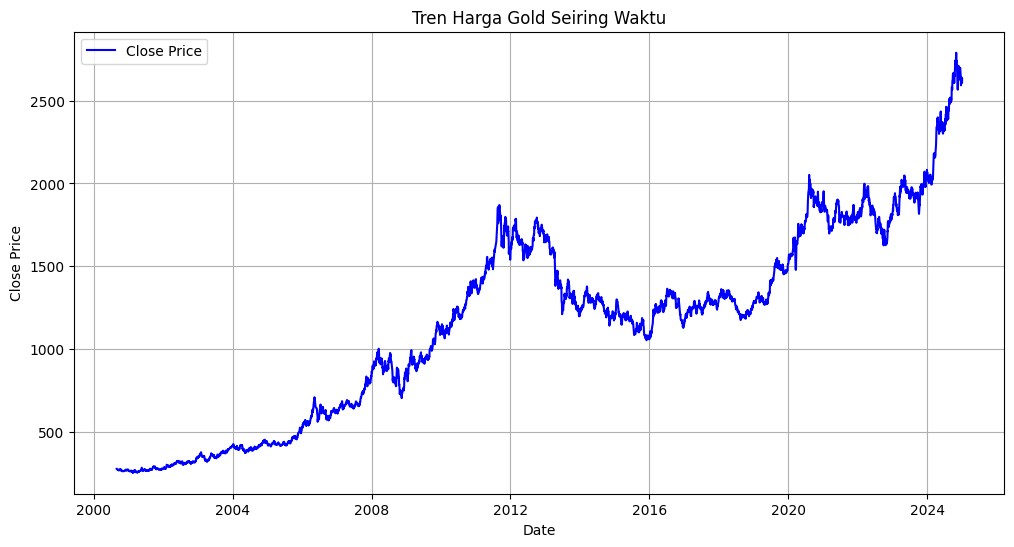

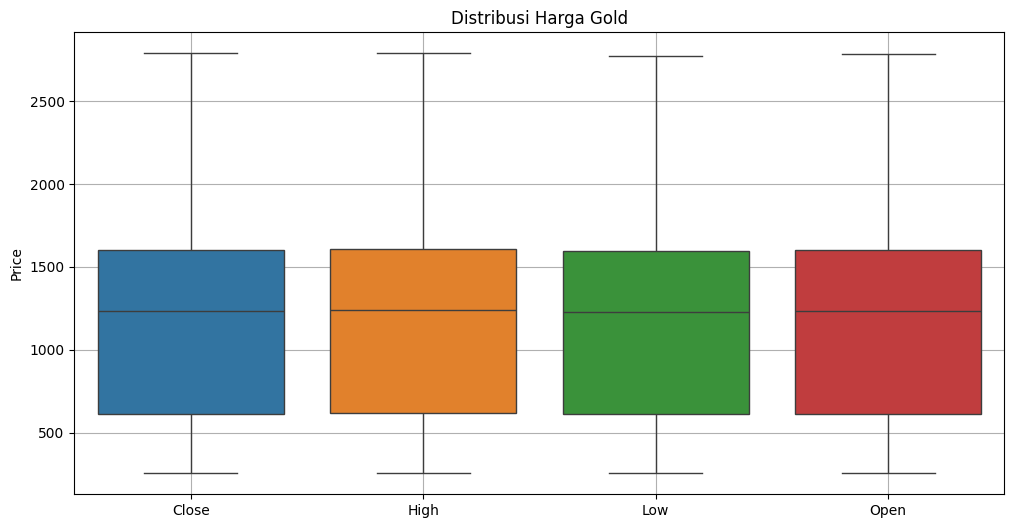

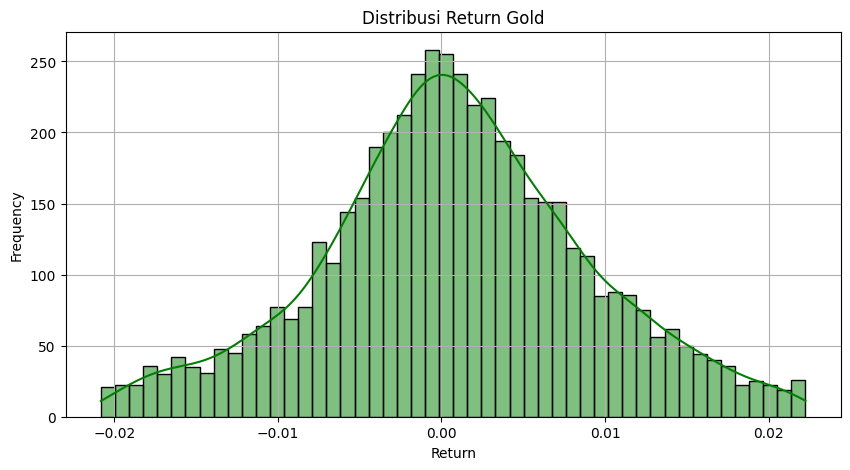

In [12]:
visualize_data(df_gold, "Gold")

In [13]:
df_gold.to_csv("../dataset/gold_data_cleaned.csv")

In [14]:
df_gold = pd.read_csv("../dataset/gold_data_cleaned.csv")

# Cek ringkasan dataset
print(df_gold.info())
print(df_gold.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5048 non-null   int64  
 1   Date        5048 non-null   object 
 2   Open        5048 non-null   float64
 3   High        5048 non-null   float64
 4   Low         5048 non-null   float64
 5   Close       5048 non-null   float64
 6   Volume      5048 non-null   int64  
 7   Return      5048 non-null   float64
 8   Ticker      5048 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 355.1+ KB
None
        Unnamed: 0         Open         High          Low        Close  \
count  5048.000000  5048.000000  5048.000000  5048.000000  5048.000000   
mean   3009.228011  1154.158479  1159.316562  1149.129457  1154.483101   
std    1771.741053   584.185091   587.151497   581.429904   584.487533   
min       0.000000   255.000000   256.100006   255.000000   255.100006   
25% 